#### <center><h1> MA Models Time Series- Dr.Milan Joshi (Lead Machine Learning Scientist - ReNew Power(Climate connect Digital)</h1></center> 

![ma](ma.png)

## Modelling Rerturns

In time series modeling, it is common to model returns rather than prices because returns provide a more stationary series that is easier to model and analyze.

Returns are defined as the percentage change in price between two time periods. By modeling returns, we remove the effect of the level of prices and focus on the changes in prices. This results in a series that is more likely to exhibit stationary behavior, meaning that statistical properties of the series, such as the mean and variance, remain constant over time.

In contrast, modeling the level of prices directly can lead to non-stationary behavior, which makes it more difficult to identify trends, seasonality, and other patterns that are useful for forecasting. Additionally, the level of prices may be influenced by external factors such as inflation, interest rates, or changes in supply and demand, which can complicate the modeling process.

Therefore, modeling returns rather than prices can help to simplify the modeling process, reduce the impact of external factors, and provide more accurate forecasts.

## Importing the relevant packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima.model import ARIMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

C:\Users\Milan Amrut Joshi\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


## Importing the Data and Pre-processing 

In [7]:
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [8]:
df_comp['market_value']=df_comp.ftse

In [12]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [13]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

In [14]:
import warnings
warnings.filterwarnings("ignore")

## Creating Returns

In [28]:
df['returns'] = df.market_value.pct_change(1)*100
df_test['returns'] = df_test.market_value.pct_change(1)*100

## ACF for Returns

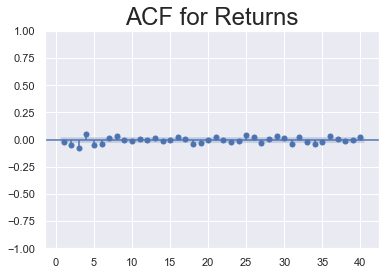

In [86]:
sgt.plot_acf(df.returns[1:], zero = False, lags = 40)
plt.title("ACF for Returns", size=24)
plt.show()

## MA(1) for Returns

In [22]:
model_ret_ma_1 = ARIMA(df.returns, order=(0, 0, 1))
results_ret_ma_1 = model_ret_ma_1.fit()

# Print the model summary
print(results_ret_ma_1.summary())



                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 1)   Log Likelihood               -7929.595
Date:                Sat, 18 Mar 2023   AIC                          15865.190
Time:                        20:40:36   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.146      0.252      -0.013       0.051
ma.L1         -0.0257      0.009     -3.018      0.003      -0.042      -0.009
sigma2         1.3789      0.014     99.990      0.0

- **Dep. Variable**: This refers to the dependent variable in the model, which in this case is "returns."
- **No. Observations**: This is the number of observations used in the model, which is 5020 in this case.
- **Model**: This specifies the type of model used, which is ARIMA(0,0,1) in this case. ARIMA stands for AutoRegressive Integrated Moving Average, and the numbers in parentheses refer to the orders of the AR, I, and MA components, respectively.
- **Log Likelihood**: This is the log-likelihood of the model, which is a measure of how well the model fits the data. A higher log-likelihood indicates a better fit.
- **AIC**: This stands for Akaike Information Criterion, which is a measure of the relative quality of a statistical model for a given set of data. The lower the AIC, the better the model.
- **BIC**: This stands for Bayesian Information Criterion, which is similar to AIC but takes into account the sample size more heavily. The lower the BIC, the better the model.
- **Sample**: This specifies the time range of the data used in the model, which is from January 10, 1994, to April 5, 2013.
- **Covariance Type**: This specifies the type of covariance matrix used, which is "opg" in this case.
- **Coefficients**: These are the estimated coefficients for the model. "const" refers to the intercept term, "ma.L1" refers to the lag-1 moving average coefficient, and "sigma2" refers to the variance of the error term.
- **Std Err**: These are the standard errors of the coefficient estimates.
z: These are the z-scores for the coefficient estimates, which are calculated as the coefficient estimate divided by its standard error. They are used to test the null hypothesis that the coefficient is equal to zero.
- **P>|z|**: This is the p-value associated with the z-score for each coefficient estimate. A p-value less than 0.05 indicates that the coefficient is statistically significant.
- **[0.025 0.975]**: These are the 95% confidence intervals for the coefficient estimates.
- **Ljung-Box (L1) (Q)**: This is the Ljung-Box statistic for the residuals, which is a test for autocorrelation in the residuals. In this case, the value is 0.01 and the associated p-value is 0.92, indicating that there is no evidence of autocorrelation.
- **Jarque-Bera (JB)**: This is a test for normality of the residuals, with a higher value indicating a departure from normality. In this case, the value is 7852.85 and the associated p-value is 0.00, indicating that there is evidence of non-normality.
- **Heteroskedasticity (H)**: This is a test for heteroskedasticity in the residuals, with a higher value indicating more heteroskedasticity. In this case, the value is 2.04 and the associated p-value is 0.00, indicating that there is evidence of heteroskedasticity.
- **Prob(H) (two-sided)**: This is the p-value associated with the Heteroskedasticity test, with a value less than 0.05 indicating evidence of heteroskedasticity.
- **Kurtosis**: This is a measure of the peakedness of the distribution of the residuals, with a higher value indicating a more peaked distribution. In this case, the value is 9.13.


**This warning typically appears when calculating the covariance matrix of the model parameters using a numerical approximation method known as the complex-step method. The complex-step method is a technique for estimating gradients in numerical optimization and is often used to compute the covariance matrix of the model parameters.**

**The warning message indicates that the covariance matrix was calculated using this approximation method rather than an exact calculation. This method is generally accurate but may not be as precise as exact calculations.**

**In summary, this warning is just to let you know that the covariance matrix of the model parameters was calculated using an approximation method, but this should not affect the validity of the model's results.**

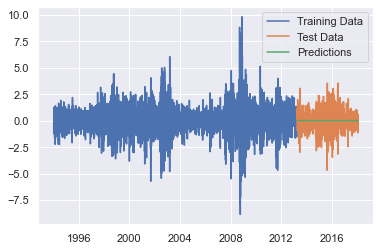

In [30]:

model_fit = model_ret_ma_1.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

## Higher-Lag MA Models for Returns

In [32]:
model_ret_ma_2 = ARIMA(df.returns[1:], order=(0,0,2))
results_ret_ma_2 = model_ret_ma_2.fit()
print(results_ret_ma_2.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_1, model_ret_ma_2)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 2)   Log Likelihood               -7922.864
Date:                Sat, 18 Mar 2023   AIC                          15853.728
Time:                        20:48:02   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0188      0.016      1.204      0.228      -0.012       0.049
ma.L1         -0.0327      0.009     -3.760      0.000      -0.050      -0.016
ma.L2         -0.0502      0.008     -6.416      0.0

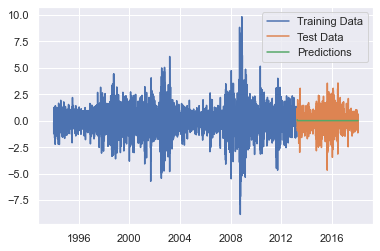

In [33]:
model_fit = model_ret_ma_2.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [35]:
model_ret_ma_3 = ARIMA(df.returns[1:], order=(0,0,3))
results_ret_ma_3 = model_ret_ma_3.fit()
print(results_ret_ma_3.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_2, model_ret_ma_3)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 3)   Log Likelihood               -7904.317
Date:                Sat, 18 Mar 2023   AIC                          15818.634
Time:                        20:48:34   BIC                          15851.240
Sample:                    01-10-1994   HQIC                         15830.060
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.296      0.195      -0.010       0.048
ma.L1         -0.0203      0.009     -2.334      0.020      -0.037      -0.003
ma.L2         -0.0556      0.008     -7.032      0.0

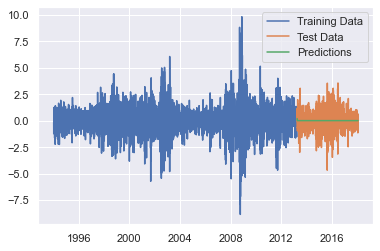

In [38]:
model_fit = model_ret_ma_3.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [36]:
model_ret_ma_4 = ARIMA(df.returns[1:], order=[0,0,4])
results_ret_ma_4 = model_ret_ma_4.fit()
print(results_ret_ma_4.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_3, model_ret_ma_4)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 4)   Log Likelihood               -7898.773
Date:                Sat, 18 Mar 2023   AIC                          15809.547
Time:                        20:48:48   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.236      0.217      -0.011       0.049
ma.L1         -0.0203      0.009     -2.239      0.025      -0.038      -0.003
ma.L2         -0.0551      0.008     -6.835      0.0

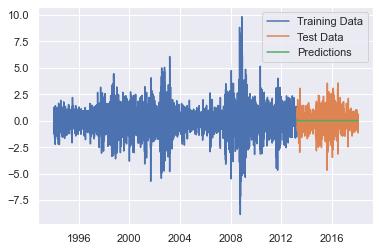

In [37]:
model_fit = model_ret_ma_4.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [39]:
model_ret_ma_5 = ARIMA(df.returns[1:], order=[0,0,5])
results_ret_ma_5 = model_ret_ma_5.fit()
print(results_ret_ma_5.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_4, model_ret_ma_5)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 5)   Log Likelihood               -7892.823
Date:                Sat, 18 Mar 2023   AIC                          15799.645
Time:                        20:49:40   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.282      0.200      -0.010       0.048
ma.L1         -0.0262      0.009     -2.839      0.005      -0.044      -0.008
ma.L2         -0.0497      0.008     -6.147      0.0

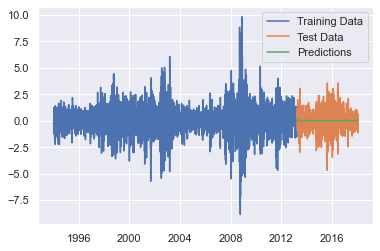

In [40]:
model_fit = model_ret_ma_5.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [41]:
model_ret_ma_6 = ARIMA(df.returns[1:], order=[0,0,6])
results_ret_ma_6 = model_ret_ma_6.fit()
print(results_ret_ma_6.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_5, model_ret_ma_6)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 6)   Log Likelihood               -7889.221
Date:                Sat, 18 Mar 2023   AIC                          15794.442
Time:                        20:50:06   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.014      1.318      0.188      -0.009       0.047
ma.L1         -0.0237      0.009     -2.562      0.010      -0.042      -0.006
ma.L2         -0.0486      0.008     -5.982      0.0

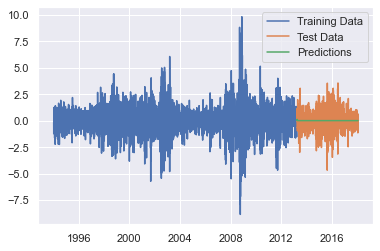

In [43]:
model_fit = model_ret_ma_6.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [44]:
model_ret_ma_7 = ARIMA(df.returns[1:], order=[0,0,7])
results_ret_ma_7 = model_ret_ma_7.fit()
print(results_ret_ma_7.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_6, model_ret_ma_7)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 7)   Log Likelihood               -7889.046
Date:                Sat, 18 Mar 2023   AIC                          15796.091
Time:                        20:50:48   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.303      0.193      -0.010       0.047
ma.L1         -0.0247      0.009     -2.645      0.008      -0.043      -0.006
ma.L2         -0.0488      0.008     -6.000      0.0

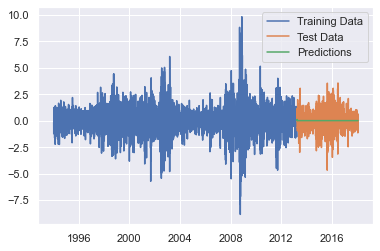

In [45]:
model_fit = model_ret_ma_7.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [47]:
model_ret_ma_8 = ARIMA(df.returns[1:], order=[0,0,8])
results_ret_ma_8 = model_ret_ma_8.fit()
print(results_ret_ma_8.summary())
print("\nLLR test p-value = " + str(LLR_test(model_ret_ma_7, model_ret_ma_8)))

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood               -7885.603
Date:                Sat, 18 Mar 2023   AIC                          15791.205
Time:                        20:51:19   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0189      0.015      1.253      0.210      -0.011       0.048
ma.L1         -0.0238      0.009     -2.527      0.011      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.053      0.0

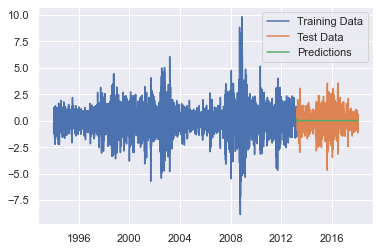

In [48]:
model_fit = model_ret_ma_8.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['returns'], label='Training Data')
plt.plot(df_test.index, df_test['returns'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [49]:
LLR_test(model_ret_ma_6, model_ret_ma_8, DF = 2)

0.027

## Residuals for Returns

In [50]:
df['res_ret_ma_8'] = results_ret_ma_8.resid[1:]

In [51]:
print("The mean of the residuals is " + str(round(df.res_ret_ma_8.mean(),3)) + "\nThe variance of the residuals is " + str(round(df.res_ret_ma_8.var(),3)))

The mean of the residuals is -0.0
The variance of the residuals is 1.356


In [52]:
round(sqrt(df.res_ret_ma_8.var()),3)

1.164

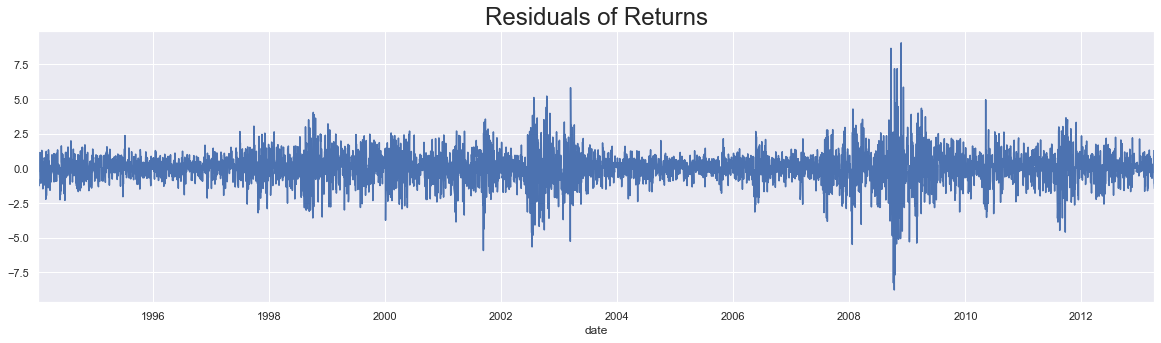

In [53]:
df.res_ret_ma_8[1:].plot(figsize = (20,5))
plt.title("Residuals of Returns", size = 24)
plt.show()

In [54]:
sts.adfuller(df.res_ret_ma_8[2:])

(-70.83537125570875,
 0.0,
 0,
 5018,
 {'1%': -3.4316538358533277,
  '5%': -2.8621161549128313,
  '10%': -2.567076687880585},
 15684.052217389359)

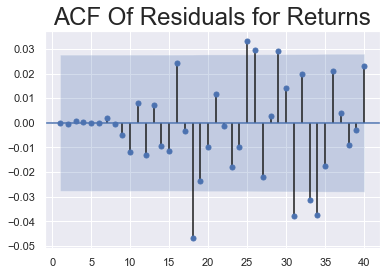

In [23]:
sgt.plot_acf(df.res_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Returns",size=24)
plt.show()

## Normalized Returns

Modeling returns rather than prices in time series modeling is useful because it removes the effect of the level of prices and focuses on the changes in prices. This can result in a more stationary series, which is easier to model and analyze.

Normalized returns, which are returns that have been scaled to have a mean of zero and a standard deviation of one, are often used in time series modeling. Normalizing the returns can make it easier to compare the magnitude of the returns over time, since the returns are on a common scale. Normalization can also make it easier to interpret the coefficients of the model, since they are expressed in terms of standard deviations.

When modeling normalized returns, it is important to keep in mind that the interpretation of the coefficients changes. The coefficients now represent the change in the dependent variable (i.e., the normalized returns) for a one-standard deviation change in the independent variable. This can make it more difficult to interpret the coefficients in terms of the original units of the variable.

In general, whether to use normalized returns or not depends on the specific context and purpose of the analysis. Normalization can be useful for certain types of analyses, such as comparing the magnitude of returns across different assets or time periods. However, normalization may not be necessary or appropriate for all types of analyses.

In [76]:
bench_ret1 = df.returns.iloc[1]
df['norm_ret1'] = df.returns.div(bench_ret1).mul(100)
bench_ret2 = df_test.returns.iloc[1]
df_test['norm_ret2'] = df_test.returns.div(bench_ret2).mul(100)


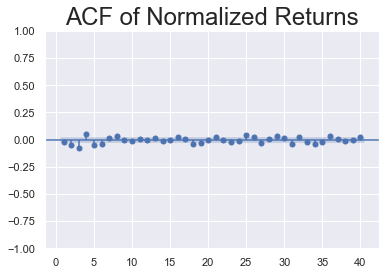

In [77]:
sgt.plot_acf(df.norm_ret1[1:], zero = False, lags = 40)
plt.title("ACF of Normalized Returns",size=24)
plt.show()

In [78]:
model_norm_ret_ma_8 = ARIMA(df.norm_ret1[1:], order=(0,0,8))
results_norm_ret_ma_8 = model_norm_ret_ma_8.fit()
results_norm_ret_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              norm_ret1   No. Observations:                 5020
Model:                 ARIMA(0, 0, 8)   Log Likelihood              -40307.614
Date:                Sat, 18 Mar 2023   AIC                          80635.228
Time:                        21:27:39   BIC                          80700.440
Sample:                    01-10-1994   HQIC                         80658.079
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.9731      9.658     -1.240      0.215     -30.902       6.956
ma.L1         -0.0238      0.009     -2.518      0.012      -0.042      -0.005
ma.L2         -0.0495      0.008     -6.030      0.000      -0.066      -0.033
ma.L3         -0.0847      0.008    -10.271      0.000      -0.101      -0.069
ma.L4          0.0488      0.009      5.594      0.000       0.032       0.066
ma.L5         -0.0518      0.008     -6.281      0.000      -0.068      -0.036
ma.L6         -0.0402      0.009     -4.394      0.000      -0.058      -0.022
ma.L7          0.0084      0.009      0.935      0.350      -0.009       0.026
ma.L8          0.0365      0.009      3.866      0.000       0.018       0.055
sigma2      5.538e+05   6087.727     90.971      0.000    5.42e+05    5.66e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6440.41
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               2.00   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

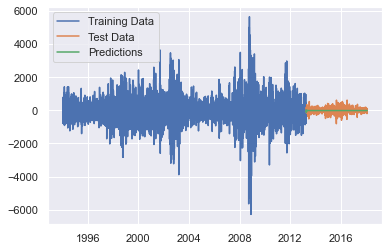

In [79]:
model_fit = model_norm_ret_ma_8.fit()

# Make predictions for the test set
predictions = model_fit.predict(start=len(df), end=len(df)+len(df_test)-1, dynamic=False)

# Plot the original data and the predictions
plt.plot(df.index, df['norm_ret1'], label='Training Data')
plt.plot(df_test.index, df_test['norm_ret2'], label='Test Data')
plt.plot(df_test.index, predictions, label='Predictions')
plt.legend()
plt.show()

In [80]:
df['res_norm_ret_ma_8'] = results_ret_ma_8.resid[1:]

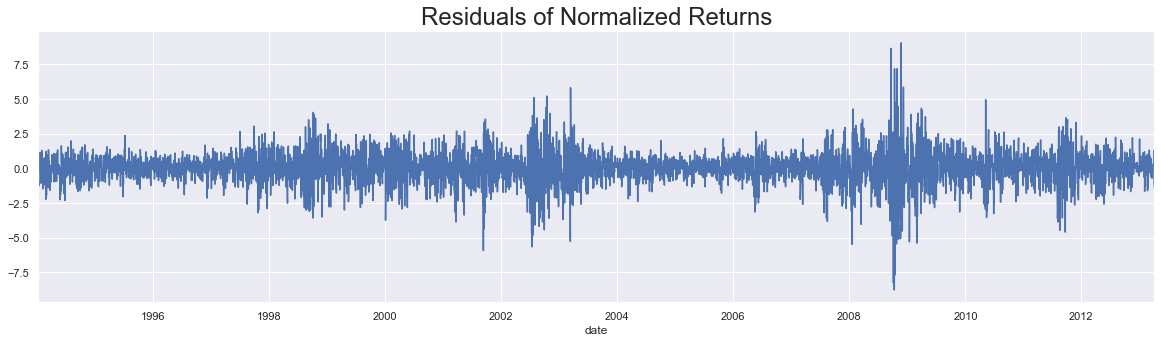

In [81]:
df.res_norm_ret_ma_8[1:].plot(figsize=(20,5))
plt.title("Residuals of Normalized Returns",size=24)
plt.show()

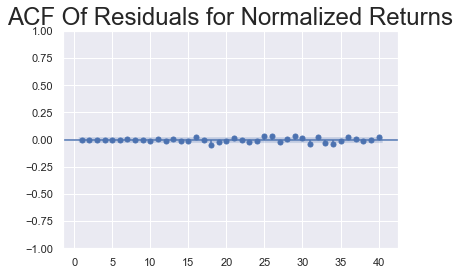

In [82]:
sgt.plot_acf(df.res_norm_ret_ma_8[2:], zero = False, lags = 40)
plt.title("ACF Of Residuals for Normalized Returns",size=24)
plt.show()

## MA Models For Prices

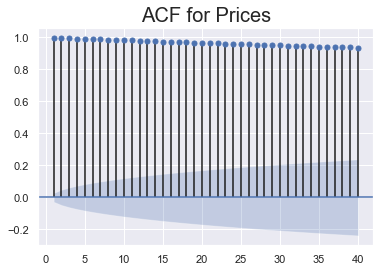

In [40]:
sgt.plot_acf(df.market_value, zero = False, lags = 40)
plt.title("ACF for Prices", size=20)
plt.show()

In [83]:
model_ma_1 = ARIMA(df.market_value, order=(1,0,1))
results_ma_1 = model_ma_1.fit()
results_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -27621.875
Date:                Sat, 18 Mar 2023   AIC                          55251.749
Time:                        21:28:19   BIC                          55277.835
Sample:                    01-07-1994   HQIC                         55260.890
                         - 04-05-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       5089.6409    366.501     13.887      0.000    4371.312    5807.970
ar.L1          0.9982      0.001   1189.159      0.000       0.997       1.000
ma.L1         -0.0186      0.010     -1.894      0.058      -0.038       0.001
sigma2      3510.8350     41.068     85.489      0.000    3430.344    3591.326
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              3280.53
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               1.89   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.94
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""